In [1]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno

In [2]:
#Get Exo-Planet file and load it into pandas DataFrame
file_name = 'data\\exoplanet_data'


hec_file_name = 'data\\phl_exoplanet_catalog'
input_dir = os.getcwd()
exoplanet_file = os.path.join(input_dir, file_name + '.csv')
hec_file = os.path.join(input_dir,hec_file_name + '.csv')


#hecfile
hec = pd.read_csv(hec_file)

#DataFrame
df = pd.read_csv (exoplanet_file)
df = df[df["default_flag"] == 1]
df = df.reset_index()
# df=df.dropna()
df.head()

,index,planet_name,hostname,default_flag,number_of_stars,number_of_planets,planet_orbital_period,orbit_semimajor_axis,planet_radius,planet_mass,planet_equillirium_temperature,star_spectype,stellar_temperature,stellar_radius,stellar_mass,stellar_age,system_distance
0,0,11 Com b,11 Com,1,2,1,326.03000,1.29,NaN,NaN,NaN,G8 III,4742.0,19.00,2.70,NaN,93.1846
1,3,11 UMi b,11 UMi,1,1,1,516.21997,1.53,NaN,NaN,NaN,NaN,4213.0,29.79,2.78,NaN,125.3210
2,6,14 And b,14 And,1,1,1,185.84000,0.83,NaN,NaN,NaN,K0 III,4813.0,11.00,2.20,NaN,75.4392
3,12,14 Her b,14 Her,1,1,2,1773.40002,2.93,NaN,NaN,NaN,NaN,5338.0,0.93,0.90,NaN,17.9323
4,15,16 Cyg B b,16 Cyg B,1,3,1,798.50000,1.66,NaN,NaN,NaN,NaN,5750.0,1.13,1.08,NaN,21.1397


In [3]:
# Check total dataset
print("Total exoplanets in the Dataset are",df.shape[0])


Total exoplanets in the Dataset are 4569


### Classification on the number of host stars

In [4]:
# unary_system = df[df["number_of_stars"]== 1]
# total_unary_system = unary_system.shape[0]

# binary_system

stars = df.value_counts('number_of_stars')
stars

number_of_stars
1    4124
2     390
3      53
4       2
dtype: int64

In [5]:
planets = df.value_counts('number_of_planets')
planets

number_of_planets
1    2600
2    1042
3     495
4     244
5     125
6      48
8       8
7       7
dtype: int64

In [6]:
spec_type = df.value_counts('star_spectype')
spec_type

star_spectype
G0 V        41
K2 V        29
K0 V        23
F8 V        23
G5 V        22
            ..
K1.5 III     1
F6 IV-V      1
M1 III       1
F5 IV        1
m3 V         1
Length: 180, dtype: int64

<AxesSubplot:>

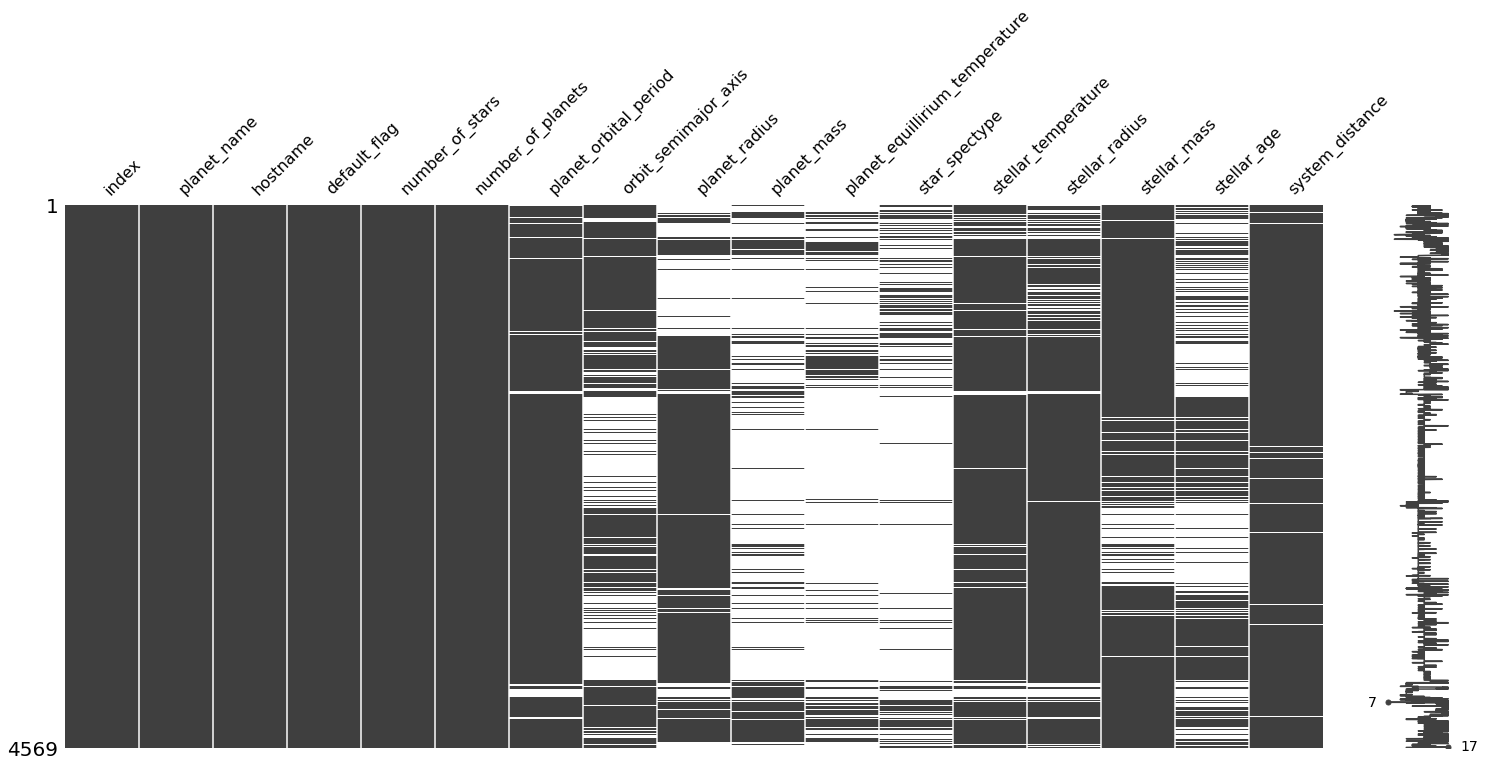

In [7]:
msno.matrix(df)
# white indicates missing data

In [8]:
hec.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [9]:
target_count = hec['P_HABITABLE'].value_counts()
'''
0 --> not habitable
1 --> conservative
2 --> optimistic
'''
target_count

0    3993
2      34
1      21
Name: P_HABITABLE, dtype: int64

In [10]:
# drop not habitable planets
hec = hec[hec.P_HABITABLE != 0]

In [11]:
# create habitable column for planets data with the help of hec dataframe
# get names of planets

habitable_planets = hec.P_NAME.values
df['habitable'] = df['planet_name'].isin(habitable_planets)

In [12]:
target_count = df['habitable'].value_counts()
print(f'Class 0: {target_count[0]}')
print(f'Class 1: {target_count[1]}')
print(f'Percentage of Majority Class: {round(target_count[0] / sum(target_count), 4)*100}')
print(f'Percentage of Minority Class: {round(target_count[1] / sum(target_count), 4)*100}')

Class 0: 4515
Class 1: 54
Percentage of Majority Class: 98.82
Percentage of Minority Class: 1.18


### Handling Missing Data

In [13]:
# remove columns with more than 40% missing data
def remove_missing(f):
    count = len(df[df[f].isnull()])
    if count/len(df) > 0.4:
        return 1
    else:
        return 0

missing_values = [x for x in df.columns if remove_missing(x)]
df = df.drop(missing_values, axis=1)

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor

# IterativeImputer
# get only numeric values
numeric_values = df[df._get_numeric_data().columns]
imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=76)
numeric_values = pd.DataFrame(imp.fit_transform(numeric_values), columns=numeric_values.columns)
numeric_values.to_csv('Imputed Data.csv', index='rowid')

In [17]:
imputed_numerics = pd.read_csv('data/Imputed Data.csv')

In [18]:
# merge imputed data with the planets dataframe
for i in imputed_numerics.columns:
    if i not in df.columns:
        pass
    else:
        df[i] = imputed_numerics[i]

<AxesSubplot:>

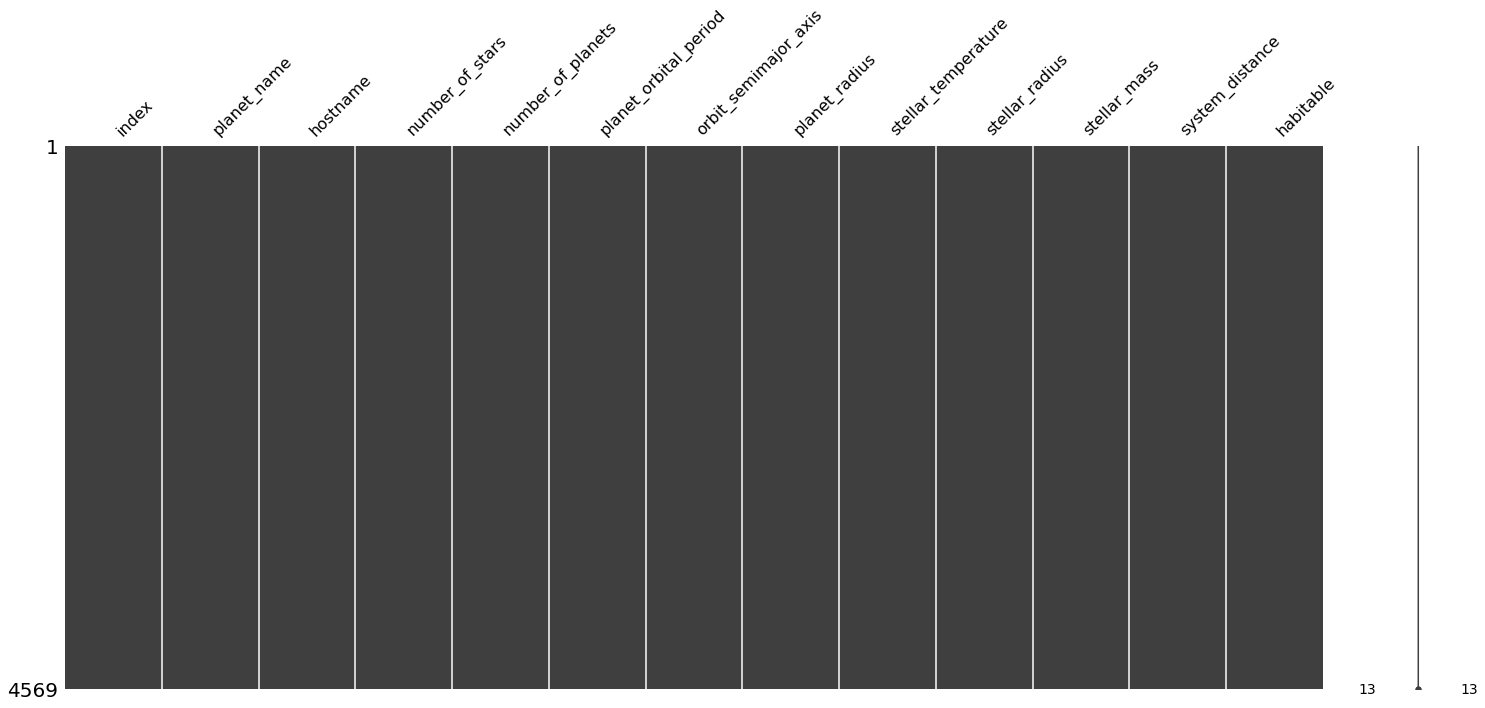

In [21]:
# also drop these columns too since they are useless to modeling
cols_to_drop = ['default_flag']

df = df.drop(cols_to_drop, axis=1)


msno.matrix(df)

In [22]:
df

,index,planet_name,hostname,number_of_stars,number_of_planets,planet_orbital_period,orbit_semimajor_axis,planet_radius,stellar_temperature,stellar_radius,stellar_mass,system_distance,habitable
0,0.0,11 Com b,11 Com,2.0,1.0,326.030000,1.290000,14.02644,4742.0000,19.00,2.70,93.1846,0.0
1,3.0,11 UMi b,11 UMi,1.0,1.0,516.219970,1.530000,14.78741,4213.0000,29.79,2.78,125.3210,0.0
2,6.0,14 And b,14 And,1.0,1.0,185.840000,0.830000,13.37516,4813.0000,11.00,2.20,75.4392,0.0
3,12.0,14 Her b,14 Her,1.0,2.0,1773.400020,2.930000,5.13886,5338.0000,0.93,0.90,17.9323,0.0
4,15.0,16 Cyg B b,16 Cyg B,3.0,1.0,798.500000,1.660000,8.45273,5750.0000,1.13,1.08,21.1397,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564,29580.0,tau Gem b,tau Gem,1.0,1.0,305.500000,1.170000,14.61674,4388.0000,26.80,2.30,112.5370,0.0
4565,29588.0,ups And b,ups And,2.0,3.0,4.617033,0.059222,6.44500,6279.6242,1.56,1.30,13.4054,0.0
4566,29590.0,ups And c,ups And,2.0,3.0,241.258000,0.827774,6.52678,6258.6534,1.56,1.30,13.4054,0.0
4567,29598.0,ups And d,ups And,2.0,3.0,1276.460000,2.513290,6.52678,6238.3519,1.56,1.30,13.4054,0.0


In [23]:
# Any missing values?
print(df.isnull().values.any())


False
